# DILAW

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

#### Data Preparation

In [2]:
# read and process the charts dataset
df = pd.read_csv('data/ph_spotify_daily_charts.csv')
#transform date column into a datetime column
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.head()

,position,track_id,track_name,artist,streams
date,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


### Show ALL tracks from 2017-2023

In [3]:
# Filter chart year 2017-2023
charts_year17to23 = df[(df.index.year>=2017)&(df.index.year<=2023)]
charts_year17to23

,position,track_id,track_name,artist,streams
date,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656
...,...,...,...,...,...
2023-03-31,196,4VXIryQMWpIdGgYR4TrjT1,All Girls Are The Same,Juice WRLD,63001
2023-03-31,197,22Nd3GuO7sHopPjdKccRcq,An Art Gallery Could Never Be As Unique As You,mrld,62803
2023-03-31,198,2lgz3yy1AyoceOVOOBmiOS,Stickwitu,The Pussycat Dolls,62731


### Total Tracks 2017-2023

In [4]:
# Total unique tracks in the chart for year 2017-2023
total_in_charts = charts_year17to23['track_name'].nunique()
total_in_charts

3660

## Threshold

In [5]:
# possible basis daily streams threshold : mean
charts_year17to23['streams'].mean()

59695.906076488216

In [6]:
# minimum and maximum daliy streams
charts_year17to23['streams'].min(), charts_year17to23['streams'].max()

(11004, 1095809)

In [7]:
charts_year17to23.median()

C:\Users\Justin\AppData\Local\Temp\ipykernel_7660\123415438.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  charts_year17to23.median()


position      101.0
streams     41029.0
dtype: float64

### FINAL BASIS

> Tracks with 41k+ streams with Top 100 Spots

In [8]:
# Filter: 10k daily streams, minimum positin top 100, chart from 2017-2023
tracks17to23_df = df[(df['position'] <= 100) & (df['streams'] >=41000) & (df.index.year >= 2017) & (df.index.year <= 2023)]
tracks17to23_df

,position,track_id,track_name,artist,streams
date,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656
...,...,...,...,...,...
2023-03-31,96,5l9g7py8RCblcvbZgGQgSd,Pagtingin,Ben&Ben,94457
2023-03-31,97,68HocO7fx9z0MgDU0ZPHro,Every Summertime,NIKI,94395
2023-03-31,98,0bhzB5PBUVqZSux5Y7t5ED,Ikaw Lamang,Silent Sanctuary,94149


## MAINSTAY TRACKS PER YEAR

#### 2017

In [9]:
#for all tracks for year 2017

vals_dict17 = {'main_track_id' : [], 'main_track_name' : [], 'main_artist' : [], 'main_streams' : []}
cols = df['track_id'].unique()

for i in cols:
    temp_df = df[(df['track_id'] == i) & (df['position'] <= 100) & (df['streams'] >= 10000) & (df.index.year == 2017)]
    
    if len(temp_df) >= 330:
        vals_dict17['main_track_id'].append(i)
        vals_dict17['main_track_name'].append(temp_df['track_name'].unique()[0])
        vals_dict17['main_artist'].append(temp_df['artist'].unique()[0])
        vals_dict17['main_streams'].append(len(temp_df))

pd.DataFrame(vals_dict17)


,main_track_id,main_track_name,main_artist,main_streams
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,365
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,365
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,365
3,4nMlau89VAjmV7agkl7OY3,Fresh Eyes,Andy Grammer,334
4,2IMODbij0lZ5CuAjZi0IDE,Sila,SUD,364
5,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,Silent Sanctuary,365
6,6NFKf8vBApSvtzkapYmnVR,Tadhana,Up Dharma Down,365
7,6fxVffaTuwjgEk5h9QyRjy,Photograph,Ed Sheeran,363
8,6M21eWbEw74XDdoQsNIinq,Malaya (Camp Sawi Original Motion Picture Soun...,Moira Dela Torre,365
9,0KKkJNfGyhkQ5aFogxQAPU,That's What I Like,Bruno Mars,363


#### 2018

In [10]:
#for all tracks for year 2018

vals_dict18 = {'main_track_id' : [], 'main_track_name' : [], 'main_artist' : [], 'main_streams' : []}
cols = df['track_id'].unique()

for i in cols:
    temp_df = df[(df['track_id'] == i) & (df['position'] <= 100) & (df['streams'] >= 41000) & (df.index.year == 2018)]
    
    if len(temp_df) >= 330:
        vals_dict18['main_track_id'].append(i)
        vals_dict18['main_track_name'].append(temp_df['track_name'].unique()[0])
        vals_dict18['main_artist'].append(temp_df['artist'].unique()[0])
        vals_dict18['main_streams'].append(len(temp_df))

pd.DataFrame(vals_dict18)

,main_track_id,main_track_name,main_artist,main_streams
0,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,365
1,6NFKf8vBApSvtzkapYmnVR,Tadhana,Up Dharma Down,364
2,1mXVgsBdtIVeCLJnSnmtdV,Too Good At Goodbyes,Sam Smith,354
3,3WUEs51GpcvlgU7lehLgLh,Kathang Isip,Ben&Ben,334
4,76cy1WJvNGJTj78UqeA5zr,IDGAF,Dua Lipa,358


#### 2019

In [11]:
#for all tracks for year 2019

vals_dict19 = {'main_track_id' : [], 'main_track_name' : [], 'main_artist' : [], 'main_streams' : []}
cols = df['track_id'].unique()

for i in cols:
    temp_df = df[(df['track_id'] == i) & (df['position'] <= 100) & (df['streams'] >= 41000) & (df.index.year == 2019)]
    
    if len(temp_df) >= 330:
        vals_dict19['main_track_id'].append(i)
        vals_dict19['main_track_name'].append(temp_df['track_name'].unique()[0])
        vals_dict19['main_artist'].append(temp_df['artist'].unique()[0])
        vals_dict19['main_streams'].append(len(temp_df))

pd.DataFrame(vals_dict19)

,main_track_id,main_track_name,main_artist,main_streams
0,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,355
1,3WUEs51GpcvlgU7lehLgLh,Kathang Isip,Ben&Ben,365
2,4OBZT9EnhYIV17t4pGw7ig,Best Part (feat. Daniel Caesar),H.E.R.,363
3,1yDiru08Q6omDOGkZMPnei,Maybe The Night,Ben&Ben,365
4,4u8RkgV6P4TLi89SmlUtv8,Mundo,IV Of Spades,365
5,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,December Avenue,365
6,2P91MQbaiQOfbiz9VqhqKQ,I Like Me Better,Lauv,365
7,5nMKJJ5Rl6X1yn58aVeICO,Bulong,December Avenue,363
8,2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,December Avenue,365
9,1X4l4i472kW5ofFP8Xo0x0,Sana - Single Version,I Belong to the Zoo,365


#### 2020

In [12]:
#for all tracks for year 2020

vals_dict20 = {'main_track_id' : [], 'main_track_name' : [], 'main_artist' : [], 'main_streams' : []}
cols = df['track_id'].unique()

for i in cols:
    temp_df = df[(df['track_id'] == i) & (df['position'] <= 100) & (df['streams'] >= 41000) & (df.index.year == 2020)]
    
    if len(temp_df) >= 330:
        vals_dict20['main_track_id'].append(i)
        vals_dict20['main_track_name'].append(temp_df['track_name'].unique()[0])
        vals_dict20['main_artist'].append(temp_df['artist'].unique()[0])
        vals_dict20['main_streams'].append(len(temp_df))

pd.DataFrame(vals_dict20)

,main_track_id,main_track_name,main_artist,main_streams
0,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,335
1,3OpGUlDmRUXh0NkIYWoIlD,Your Song,Parokya Ni Edgar,341
2,3WUEs51GpcvlgU7lehLgLh,Kathang Isip,Ben&Ben,366
3,1yDiru08Q6omDOGkZMPnei,Maybe The Night,Ben&Ben,366
4,6wdCelHrPh7UfliNjwRTUv,Leaves,Ben&Ben,365
5,2P91MQbaiQOfbiz9VqhqKQ,I Like Me Better,Lauv,339
6,2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,December Avenue,363
7,1X4l4i472kW5ofFP8Xo0x0,Sana - Single Version,I Belong to the Zoo,365
8,5l9g7py8RCblcvbZgGQgSd,Pagtingin,Ben&Ben,366
9,4rG3h1QwgjSSWz8EIjCFrm,Araw-Araw,Ben&Ben,356


#### 2021

In [13]:
#for all tracks for year 2021

vals_dict21 = {'main_track_id' : [], 'main_track_name' : [], 'main_artist' : [], 'main_streams' : []}
cols = df['track_id'].unique()

for i in cols:
    temp_df = df[(df['track_id'] == i) & (df['position'] <= 100) & (df['streams'] >= 41000) & (df.index.year == 2021)]
    
    if len(temp_df) >= 330:
        vals_dict21['main_track_id'].append(i)
        vals_dict21['main_track_name'].append(temp_df['track_name'].unique()[0])
        vals_dict21['main_artist'].append(temp_df['artist'].unique()[0])
        vals_dict21['main_streams'].append(len(temp_df))

pd.DataFrame(vals_dict21)

,main_track_id,main_track_name,main_artist,main_streams
0,3OpGUlDmRUXh0NkIYWoIlD,Your Song,Parokya Ni Edgar,365
1,3WUEs51GpcvlgU7lehLgLh,Kathang Isip,Ben&Ben,359
2,1yDiru08Q6omDOGkZMPnei,Maybe The Night,Ben&Ben,341
3,6wdCelHrPh7UfliNjwRTUv,Leaves,Ben&Ben,355
4,2P91MQbaiQOfbiz9VqhqKQ,I Like Me Better,Lauv,344
5,0Eqg0CQ7bK3RQIMPw1A7pl,Malibu Nights,LANY,339
6,5l9g7py8RCblcvbZgGQgSd,Pagtingin,Ben&Ben,337
7,4rG3h1QwgjSSWz8EIjCFrm,Araw-Araw,Ben&Ben,335
8,2Mo4pOpCYXOu33856sMQLh,Make It With You,Ben&Ben,363
9,4HBZA5flZLE435QTztThqH,Stuck with U (with Justin Bieber),Ariana Grande,350


#### 2022

In [14]:
#for all tracks for year 2022

vals_dict22 = {'main_track_id' : [], 'main_track_name' : [], 'main_artist' : [], 'main_streams' : []}
cols = df['track_id'].unique()

for i in cols:
    temp_df = df[(df['track_id'] == i) & (df['position'] <= 100) & (df['streams'] >= 41000) & (df.index.year == 2022)]
    
    if len(temp_df) >= 330:
        vals_dict22['main_track_id'].append(i)
        vals_dict22['main_track_name'].append(temp_df['track_name'].unique()[0])
        vals_dict22['main_artist'].append(temp_df['artist'].unique()[0])
        vals_dict22['main_streams'].append(len(temp_df))

pd.DataFrame(vals_dict22)

,main_track_id,main_track_name,main_artist,main_streams
0,2v5VIWMjZxeiG52KckiXxS,Ikaw Lamang,Silent Sanctuary,351
1,3WUEs51GpcvlgU7lehLgLh,Kathang Isip,Ben&Ben,363
2,6wdCelHrPh7UfliNjwRTUv,Leaves,Ben&Ben,346
3,0HZ3OUVrGHxttD2EuHqRm3,The Day You Said Goodnight,Hale,359
4,4rG3h1QwgjSSWz8EIjCFrm,Araw-Araw,Ben&Ben,350
5,5TTXEcfsYLh6fTarLaevTi,lowkey,NIKI,363
6,3afkJSKX0EAMsJXTZnDXXJ,Strawberries & Cigarettes,Troye Sivan,347
7,5F1ZmucV0uJY14y2dYKePa,Sanctuary,Joji,349
8,6I3mqTwhRpn34SLVafSH7G,Ghost,Justin Bieber,364
9,16iRlyUMJVPqz62DlomMre,Ikaw Lang,NOBITA,365


#### 2023

In [15]:
#for all tracks for year 2023

vals_dict23 = {'main_track_id' : [], 'main_track_name' : [], 'main_artist' : [], 'main_streams' : []}
cols = df['track_id'].unique()

for i in cols:
    temp_df = df[(df['track_id'] == i) & (df['position'] <= 100) & (df['streams'] >= 41000) & (df.index.year == 2023)]
    
    if len(temp_df) >= 80:
        vals_dict23['main_track_id'].append(i)
        vals_dict23['main_track_name'].append(temp_df['track_name'].unique()[0])
        vals_dict23['main_artist'].append(temp_df['artist'].unique()[0])
        vals_dict23['main_streams'].append(len(temp_df))

pd.DataFrame(vals_dict23)

,main_track_id,main_track_name,main_artist,main_streams
0,3WUEs51GpcvlgU7lehLgLh,Kathang Isip,Ben&Ben,90
1,2LBqCSwhJGcFQeTHMVGwy3,Die For You,The Weeknd,90
2,3Eb5sztvEMa0Mqnb8DUAlU,Come Inside Of My Heart,IV Of Spades,90
3,4rG3h1QwgjSSWz8EIjCFrm,Araw-Araw,Ben&Ben,90
4,1dGr1c8CrMLDpV6mPbImSI,Lover,Taylor Swift,84
...,...,...,...,...
56,0uZFcsx96wzbixsULmrg8o,Pasilyo,SunKissed Lola,90
57,3r8RuvgbX9s7ammBn07D3W,Ditto,NewJeans,90
58,65FftemJ1DbbZ45DUfHJXE,OMG,NewJeans,89
59,2vnd3JVvcLs2LxRFwC6mKu,City Girl,Shanti Dope,85


### Mainstay Tracks -- Breakdown per year

In [16]:
mainstay17 = pd.DataFrame(vals_dict17)
mainstay18 = pd.DataFrame(vals_dict18)
mainstay19 = pd.DataFrame(vals_dict19)
mainstay20 = pd.DataFrame(vals_dict20)
mainstay21 = pd.DataFrame(vals_dict21)
mainstay22 = pd.DataFrame(vals_dict22)
mainstay23 = pd.DataFrame(vals_dict23)

In [17]:
# Number of Tracks
print(len(mainstay17))
print(len(mainstay18))
print(len(mainstay19))
print(len(mainstay20))
print(len(mainstay21))
print(len(mainstay22))
print(len(mainstay23))

21
5
16
17
12
18
61


In [18]:
# Check if matching using nunique

print(mainstay17['main_track_name'].nunique())
print(mainstay18['main_track_name'].nunique())
print(mainstay19['main_track_name'].nunique())
print(mainstay20['main_track_name'].nunique())
print(mainstay21['main_track_name'].nunique())
print(mainstay22['main_track_name'].nunique())
print(mainstay23['main_track_name'].nunique())          # maybe there's a repeating track name here (year2023), but diff versions

21
5
16
17
12
18
60


### Total Number of UNIQUE Mainstay Tracks

In [19]:
# combined dataframe
mainstay_tracks17to23 = pd.concat([mainstay17, mainstay18, mainstay19, mainstay20, mainstay21, mainstay22, mainstay23])
mainstay_tracks17to23


,main_track_id,main_track_name,main_artist,main_streams
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,365
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,365
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,365
3,4nMlau89VAjmV7agkl7OY3,Fresh Eyes,Andy Grammer,334
4,2IMODbij0lZ5CuAjZi0IDE,Sila,SUD,364
...,...,...,...,...
56,0uZFcsx96wzbixsULmrg8o,Pasilyo,SunKissed Lola,90
57,3r8RuvgbX9s7ammBn07D3W,Ditto,NewJeans,90
58,65FftemJ1DbbZ45DUfHJXE,OMG,NewJeans,89
59,2vnd3JVvcLs2LxRFwC6mKu,City Girl,Shanti Dope,85


In [20]:
# based on track name
total_mainstay_tracks = mainstay_tracks17to23['main_track_name'].nunique()
total_mainstay_tracks

117

In [21]:
# see dataframe if it matches the unique number of tracks
mainstay_tracks17to23 = mainstay_tracks17to23.drop_duplicates(subset="main_track_name")
mainstay_tracks17to23.sort_values(by='main_streams', ascending=False)


,main_track_id,main_track_name,main_artist,main_streams
10,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,366
16,2Mo4pOpCYXOu33856sMQLh,Make It With You,Ben&Ben,366
15,2wrJq5XKLnmhRXHIAf9xBa,"10,000 Hours (with Justin Bieber)",Dan + Shay,366
14,2b8fOow8UzyDFAE27YhOZM,Memories,Maroon 5,366
12,65sEZZaxTjLMD8vNgPoMz5,Imahe,Magnus Haven,366
...,...,...,...,...
59,2vnd3JVvcLs2LxRFwC6mKu,City Girl,Shanti Dope,85
60,50x1Ic8CaXkYNvjmxe3WXy,Those Eyes,New West,85
4,1dGr1c8CrMLDpV6mPbImSI,Lover,Taylor Swift,84
16,7C9Knp9FzLY6RwgktmW9Ge,BMW,Because,81


In [22]:
# Set the display options to show ALL ROWs
pd.set_option('display.max_rows', None)
print(mainstay_tracks17to23)

             main_track_id                                    main_track_name  \
0   0kN8xEmgMW9mh7UmDYHlJP                               Versace on the Floor   
1   5uCax9HTNlzGybIStD3vDh                               Say You Won't Let Go   
2   7BKLCZ1jbUBVqRi2FVlTVw                                             Closer   
3   4nMlau89VAjmV7agkl7OY3                                         Fresh Eyes   
4   2IMODbij0lZ5CuAjZi0IDE                                               Sila   
5   0YyM8aEdbjGfLWPn6fdcn7                                     Pasensya Ka Na   
6   6NFKf8vBApSvtzkapYmnVR                                            Tadhana   
7   6fxVffaTuwjgEk5h9QyRjy                                         Photograph   
8   6M21eWbEw74XDdoQsNIinq  Malaya (Camp Sawi Original Motion Picture Soun...   
9   0KKkJNfGyhkQ5aFogxQAPU                                 That's What I Like   
10  5QVuf1MpdzFtFoJGwcKosa        Stay - On the Wings of Love Teleserye Theme   
11  01YEqVPCm0vqRLA9w43bic  

In [23]:
mainstay_tracks17to23.to_csv("data/mainstay_tracks17to23.csv", index=False)

### Total Number of Tracks from 2017-2023

In [24]:
# tracks based on position (top 100) and 10k daily streams
total_tracks = tracks17to23_df['track_name'].nunique()
total_tracks

1948

In [25]:
# see dataframe if it matches the unique number of tracks
tracks17to23_df = tracks17to23_df.drop_duplicates(subset="track_name")
tracks17to23_df.sort_values(by='streams', ascending=False)
tracks17to23_df                                                                     # 1 track missing(?) -- same track names but diff versions maybe

,position,track_id,track_name,artist,streams
date,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656
2017-01-01,6,6b8Be6ljOzmkOmFslEb23P,24K Magic,Bruno Mars,123924
2017-01-01,7,1qOLh0tI7trd1zdDKxYZTe,Starving,Hailee Steinfeld,123786
2017-01-01,8,5hYTyyh2odQKphUbMqc5gN,"How Far I'll Go - From ""Moana""",Alessia Cara,107298
2017-01-01,9,4pdPtRcBmOSQDlJ3Fk945m,Let Me Love You,DJ Snake,104960


### Final Percentage

In [26]:
# show summary of values


# OVERALL total unique tracks form 2017-2023

print("Total unique tracks from 2017-2023:")
total_in_charts

Total unique tracks from 2017-2023:


3660

In [27]:
# mainstay tracks
# tracks filtered 
print(total_mainstay_tracks)
print(total_tracks)

117
1948


In [28]:
# DENOMINATOR: 1948 [FILTERED] 
mainstay_percentage = total_mainstay_tracks / total_tracks * 100

print(f"The percentage of Spotify charts streams from 2017-2023 that are from mainstay tracks is {mainstay_percentage:.2f}%")

The percentage of Spotify charts streams from 2017-2023 that are from mainstay tracks is 6.01%


In [29]:
# DENOMINATOR: 3660 [OVERALL]
mainstay_percentage_overall = total_mainstay_tracks / total_in_charts * 100

print(f"The percentage of Spotify charts streams from 2017-2023 that are from mainstay tracks is {mainstay_percentage_overall:.2f}%")

The percentage of Spotify charts streams from 2017-2023 that are from mainstay tracks is 3.20%


## AUDIO FEATURES

In [30]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import keyring
import time


### Mainstay Tracks

In [31]:
client_credentials_manager = SpotifyClientCredentials(client_id=keyring.get_password('spotify', 'cid'),
                                                      client_secret=keyring.get_password('spotify', 'secret') )
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [32]:
for trackID in mainstay_tracks17to23['main_track_id']:
    print(trackID)

0kN8xEmgMW9mh7UmDYHlJP
5uCax9HTNlzGybIStD3vDh
7BKLCZ1jbUBVqRi2FVlTVw
4nMlau89VAjmV7agkl7OY3
2IMODbij0lZ5CuAjZi0IDE
0YyM8aEdbjGfLWPn6fdcn7
6NFKf8vBApSvtzkapYmnVR
6fxVffaTuwjgEk5h9QyRjy
6M21eWbEw74XDdoQsNIinq
0KKkJNfGyhkQ5aFogxQAPU
5QVuf1MpdzFtFoJGwcKosa
01YEqVPCm0vqRLA9w43bic
2PcbtMoqOlGSzOfyJlkB06
29xs643Q96uQLD8f7SxYYw
7sW3f7PqDV7BQ7qqeVBJIA
75JFxkI2RXiU7L9VXzMkle
0Dljpp52vCmtXi0E94qjfo
6xQs6y6CpDqK9VKCktApEL
6cAKeFFYW2aClZSUyvqAEW
7qiZfU4dY1lWllzX7mPBI3
4ai7c2BUjNpElhZdZDH7qF
1mXVgsBdtIVeCLJnSnmtdV
3WUEs51GpcvlgU7lehLgLh
76cy1WJvNGJTj78UqeA5zr
4OBZT9EnhYIV17t4pGw7ig
1yDiru08Q6omDOGkZMPnei
4u8RkgV6P4TLi89SmlUtv8
00mBzIWv5gHOYxwuEJXjOG
2P91MQbaiQOfbiz9VqhqKQ
5nMKJJ5Rl6X1yn58aVeICO
2BgD4nRyx9EZ5o8YEnjRSV
1X4l4i472kW5ofFP8Xo0x0
6GIzDc4xBUeYHwubWwTrhC
2BgEsaKNfHUdlh97KmvFyo
5f9808hpiCpuNyqqdXmpF2
0Eqg0CQ7bK3RQIMPw1A7pl
5NXdUJ3Z2jhlp2u1cj6f7m
2tzAN1L07SNwnOdgOEeuQr
3OpGUlDmRUXh0NkIYWoIlD
6wdCelHrPh7UfliNjwRTUv
5l9g7py8RCblcvbZgGQgSd
4rG3h1QwgjSSWz8EIjCFrm
7qEHsqek33rTcFNT9PFqLf
6VqZS3Wmf53

In [33]:
# Create a list from the 'main_track_id' column 
track_ids =  mainstay_tracks17to23['main_track_id'].tolist()

features = []
for i in range(0, len(track_ids), 50):
    audio_features = sp.audio_features(track_ids[i:i+50])
    for track in audio_features:
        features.append(track)

mainstay_audio_feat = pd.DataFrame(features)                              # Convert the list of audio features to a pandas dataframe

averages_audio_feat = mainstay_audio_feat.mean()                          # Calculate the average of each audio feature

averages_audio_feat

C:\Users\Justin\AppData\Local\Temp\ipykernel_7660\3308081134.py:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  averages_audio_feat = mainstay_audio_feat.mean()                          # Calculate the average of each audio feature


danceability             0.599598
energy                   0.502595
key                      5.888889
loudness                -7.734983
mode                     0.820513
speechiness              0.050751
acousticness             0.412502
instrumentalness         0.006887
liveness                 0.151132
valence                  0.406338
tempo                  116.991239
duration_ms         234510.290598
time_signature           3.897436
dtype: float64

In [34]:
averages_audio_features = pd.DataFrame(averages_audio_feat)
averages_audio_features

,0
danceability,0.599598
energy,0.502595
key,5.888889
loudness,-7.734983
mode,0.820513
speechiness,0.050751
acousticness,0.412502
instrumentalness,0.006887
liveness,0.151132
valence,0.406338


In [35]:
# print(track_ids)

### Dilaw

artist_id = '6Dp4LInLyMVA2qhRqQ6AGL'
artist_name = "Dilaw"

In [36]:
dilaw_charts = charts_year17to23[charts_year17to23['artist']=="Dilaw"]
dilaw_charts

,position,track_id,track_name,artist,streams
date,,,,,
2023-03-03,91,47OFMuRu5lzJHRbtEXPBbs,Uhaw (Tayong Lahat),Dilaw,90213
2023-03-04,77,47OFMuRu5lzJHRbtEXPBbs,Uhaw (Tayong Lahat),Dilaw,109480
2023-03-05,50,47OFMuRu5lzJHRbtEXPBbs,Uhaw (Tayong Lahat),Dilaw,128858
2023-03-06,47,47OFMuRu5lzJHRbtEXPBbs,Uhaw (Tayong Lahat),Dilaw,141420
2023-03-07,44,47OFMuRu5lzJHRbtEXPBbs,Uhaw (Tayong Lahat),Dilaw,152589
2023-03-08,41,47OFMuRu5lzJHRbtEXPBbs,Uhaw (Tayong Lahat),Dilaw,158594
2023-03-09,45,47OFMuRu5lzJHRbtEXPBbs,Uhaw (Tayong Lahat),Dilaw,144728
2023-03-10,43,47OFMuRu5lzJHRbtEXPBbs,Uhaw (Tayong Lahat),Dilaw,144938
2023-03-11,40,47OFMuRu5lzJHRbtEXPBbs,Uhaw (Tayong Lahat),Dilaw,155401


In [37]:
dilaw_charts.drop_duplicates(subset="track_name")

,position,track_id,track_name,artist,streams
date,,,,,
2023-03-03,91,47OFMuRu5lzJHRbtEXPBbs,Uhaw (Tayong Lahat),Dilaw,90213
2023-03-18,123,5SyigMsSY8uAV1m27fhnLD,Uhaw,Dilaw,84837


In [38]:
track_ids =  dilaw_charts['track_id'].unique()
track_ids

array(['47OFMuRu5lzJHRbtEXPBbs', '5SyigMsSY8uAV1m27fhnLD'], dtype=object)

In [39]:
# Create a list from the 'main_track_id' column 
track_ids =  track_ids.tolist()

features = []
for i in range(0, len(track_ids), 50):
    audio_features = sp.audio_features(track_ids[i:i+50])
    for track in audio_features:
        features.append(track)

dilaw_audio_feat = pd.DataFrame(features)                              # Convert the list of audio features to a pandas dataframe

dilaw_audio_feat = dilaw_audio_feat.mean()                          # Calculate the average of each audio feature

dilaw_audio_feat

C:\Users\Justin\AppData\Local\Temp\ipykernel_7660\1271549180.py:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dilaw_audio_feat = dilaw_audio_feat.mean()                          # Calculate the average of each audio feature


danceability             0.665000
energy                   0.530500
key                      3.500000
loudness                -7.929000
mode                     0.500000
speechiness              0.056750
acousticness             0.563000
instrumentalness         0.000084
liveness                 0.084650
valence                  0.250000
tempo                  128.963500
duration_ms         254117.500000
time_signature           4.000000
dtype: float64

In [40]:
dilaw_audio_feat = pd.DataFrame(dilaw_audio_feat)
dilaw_audio_feat

,0
danceability,0.665000
energy,0.530500
key,3.500000
loudness,-7.929000
mode,0.500000
speechiness,0.056750
acousticness,0.563000
instrumentalness,0.000084
liveness,0.084650
valence,0.250000


### Uhaw (Tayong Lahat)

In [41]:
track_id_uhawV1 = "47OFMuRu5lzJHRbtEXPBbs"

In [42]:
uhawV1_audio_features = sp.audio_features(track_id_uhawV1)
uhawV1_audio_features

[{'danceability': 0.635,
  'energy': 0.724,
  'key': 5,
  'loudness': -6.662,
  'mode': 1,
  'speechiness': 0.0716,
  'acousticness': 0.28,
  'instrumentalness': 3.83e-06,
  'liveness': 0.105,
  'valence': 0.316,
  'tempo': 135.927,
  'type': 'audio_features',
  'id': '47OFMuRu5lzJHRbtEXPBbs',
  'uri': 'spotify:track:47OFMuRu5lzJHRbtEXPBbs',
  'track_href': 'https://api.spotify.com/v1/tracks/47OFMuRu5lzJHRbtEXPBbs',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/47OFMuRu5lzJHRbtEXPBbs',
  'duration_ms': 241186,
  'time_signature': 4}]

In [43]:
# Convert list to dataframe
uhawV1_audio_features = pd.DataFrame(uhawV1_audio_features)
uhawV1_audio_features.T

,0
danceability,0.635
energy,0.724
key,5
loudness,-6.662
mode,1
speechiness,0.0716
acousticness,0.28
instrumentalness,0.000004
liveness,0.105
valence,0.316


> Other Info

In [44]:
# Helper function to get track data in table row format
# Caveat 1: If multiple artists are listed, this gets only the first artist 

def get_track_data(track_id_uhawV1):        
    # Get track data            
    track_data1 = sp.track(track_id_uhawV1)
    # Populate dict
    relevant_track_data = {'track_id':track_id_uhawV1}
    relevant_track_data['track_name'] = track_data1['name']
    relevant_track_data['artist_id'] = track_data1['artists'][0]['id']
    relevant_track_data['artist_name'] = track_data1['artists'][0]['name']
    relevant_track_data['album_id'] = track_data1['album']['uri'].split(":")[2]
    relevant_track_data['duration'] = track_data1['duration_ms']
    relevant_track_data['release_date'] = track_data1['album']['release_date']
    relevant_track_data['popularity'] = track_data1['popularity']

    # Get track audio features
    track_audio_features_data = sp.audio_features(track_id_uhawV1)[0] # get first element
    audio_features_keys = list(track_audio_features_data.keys())[:11]
    for key in audio_features_keys:
        try:
            relevant_track_data[key] = track_audio_features_data[key]
        except:
            # If audio features are not available
            relevant_track_data[key] = None

    return relevant_track_data

In [45]:
get_track_data(track_id_uhawV1)

{'track_id': '47OFMuRu5lzJHRbtEXPBbs',
 'track_name': 'Uhaw (Tayong Lahat)',
 'artist_id': '6Dp4LInLyMVA2qhRqQ6AGL',
 'artist_name': 'Dilaw',
 'album_id': '35qpGQN1On4Un7ZUdTVQgD',
 'duration': 241185,
 'release_date': '2022-12-16',
 'popularity': 83,
 'danceability': 0.635,
 'energy': 0.724,
 'key': 5,
 'loudness': -6.662,
 'mode': 1,
 'speechiness': 0.0716,
 'acousticness': 0.28,
 'instrumentalness': 3.83e-06,
 'liveness': 0.105,
 'valence': 0.316,
 'tempo': 135.927}

## Uhaw

In [46]:
track_id_uhawV2 = "5SyigMsSY8uAV1m27fhnLD"

In [47]:
uhawV2_audio_features = sp.audio_features(track_id_uhawV2)
uhawV2_audio_features

[{'danceability': 0.695,
  'energy': 0.337,
  'key': 2,
  'loudness': -9.196,
  'mode': 0,
  'speechiness': 0.0419,
  'acousticness': 0.846,
  'instrumentalness': 0.000165,
  'liveness': 0.0643,
  'valence': 0.184,
  'tempo': 122.0,
  'type': 'audio_features',
  'id': '5SyigMsSY8uAV1m27fhnLD',
  'uri': 'spotify:track:5SyigMsSY8uAV1m27fhnLD',
  'track_href': 'https://api.spotify.com/v1/tracks/5SyigMsSY8uAV1m27fhnLD',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5SyigMsSY8uAV1m27fhnLD',
  'duration_ms': 267049,
  'time_signature': 4}]

In [48]:
uhawV2_audio_features = pd.DataFrame(uhawV2_audio_features)
uhawV2_audio_features.T

,0
danceability,0.695
energy,0.337
key,2
loudness,-9.196
mode,0
speechiness,0.0419
acousticness,0.846
instrumentalness,0.000165
liveness,0.0643
valence,0.184


> Other Info

In [49]:
# Helper function to get track data in table row format
# Caveat 1: If multiple artists are listed, this gets only the first artist 

def get_track_data(track_id_uhawV2):        
    # Get track data            
    track_data2 = sp.track(track_id_uhawV2)
    # Populate dict
    relevant_track_data = {'track_id':track_id_uhawV2}
    relevant_track_data['track_name'] = track_data2['name']
    relevant_track_data['artist_id'] = track_data2['artists'][0]['id']
    relevant_track_data['artist_name'] = track_data2['artists'][0]['name']
    relevant_track_data['album_id'] = track_data2['album']['uri'].split(":")[2]
    relevant_track_data['duration'] = track_data2['duration_ms']
    relevant_track_data['release_date'] = track_data2['album']['release_date']
    relevant_track_data['popularity'] = track_data2['popularity']

    # Get track audio features
    track_audio_features_data = sp.audio_features(track_id_uhawV2)[0] # get first element
    audio_features_keys = list(track_audio_features_data.keys())[:11]
    for key in audio_features_keys:
        try:
            relevant_track_data[key] = track_audio_features_data[key]
        except:
            # If audio features are not available
            relevant_track_data[key] = None

    return relevant_track_data

In [50]:
get_track_data(track_id_uhawV2)

{'track_id': '5SyigMsSY8uAV1m27fhnLD',
 'track_name': 'Uhaw',
 'artist_id': '6Dp4LInLyMVA2qhRqQ6AGL',
 'artist_name': 'Dilaw',
 'album_id': '432KTeJ8URaOv2GduJw7K5',
 'duration': 267049,
 'release_date': '2022-11-18',
 'popularity': 74,
 'danceability': 0.695,
 'energy': 0.337,
 'key': 2,
 'loudness': -9.196,
 'mode': 0,
 'speechiness': 0.0419,
 'acousticness': 0.846,
 'instrumentalness': 0.000165,
 'liveness': 0.0643,
 'valence': 0.184,
 'tempo': 122.0}

# Comparison

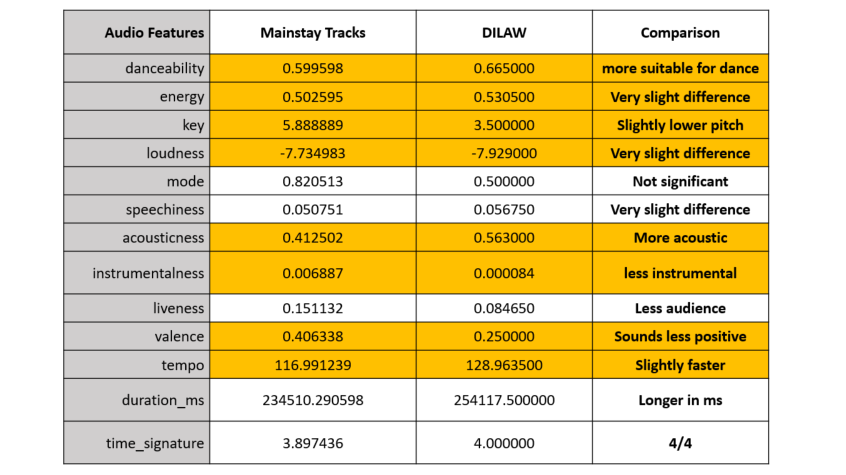

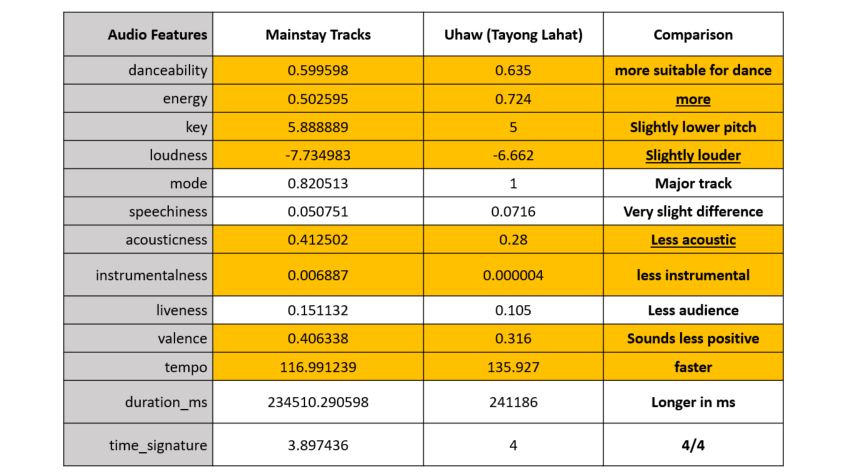

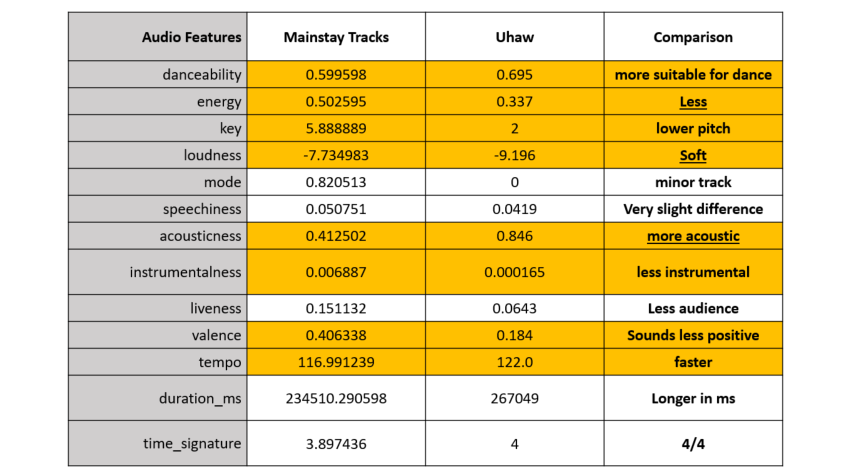